# PARCIAL 1
Apellido y Nombre: Jorge Cedillo Luis Fabian     Carrera: Ing. de Sistemas  CU: 35-5376

URL DATASET: https://archive.ics.uci.edu/dataset/942/rt-iot2022

# 📌 Importación de Librerías

Este fragmento de código importa las librerías esenciales para la clasificación de imágenes con una red neuronal MLP en PyTorch.

## 📦 Librerías Importadas

- **PyTorch (`torch`, `torch.nn`, `torch.optim`)**: Framework principal para construir y entrenar redes neuronales.
- **`tqdm`**: Para visualizar barras de progreso en los entrenamientos.
- **`torch.nn.functional`**: Funciones de activación y pérdida.
- **`torchvision.transforms` y `torchvision.datasets`**: Para la transformación y carga de conjuntos de datos de imágenes.
- **`torch.utils.data` (Dataset, DataLoader)**: Para la gestión eficiente de datos en lotes.
- **`Pandas` y `PIL`**: Manipulación de datos tabulares y procesamiento de imágenes.
- **`matplotlib.pyplot` y `seaborn`**: Visualización de datos y gráficos de métricas.
- **`sklearn.metrics`**: Evaluación del modelo con matrices de confusión y reportes de clasificación.
- **`random`**: Para manejar la aleatorización de datos.
- **`torch_optimizer`**: Biblioteca adicional con optimizadores avanzados para mejorar el entrenamiento.

In [111]:
import os
import time
import itertools
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, Dataset, TensorDataset
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [112]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


# 1 PROCESAMIENTO DEL DATASET

In [113]:
data = r"D:\1. USFX\8vo semestre\IA\Parcial 1\rt-iot2022"

In [114]:
RT = pd.read_csv(os.path.join(dataset_path, "RT_IOT2022"))

In [110]:
print(RT.head())


   Unnamed: 0  id.orig_p  id.resp_p proto service  flow_duration  \
0           0      38667       1883   tcp    mqtt      32.011598   
1           1      51143       1883   tcp    mqtt      31.883584   
2           2      44761       1883   tcp    mqtt      32.124053   
3           3      60893       1883   tcp    mqtt      31.961063   
4           4      51087       1883   tcp    mqtt      31.902362   

   fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0             9             5                  3                  3  ...   
1             9             5                  3                  3  ...   
2             9             5                  3                  3  ...   
3             9             5                  3                  3  ...   
4             9             5                  3                  3  ...   

   active.std      idle.min      idle.max      idle.tot      idle.avg  \
0         0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.97

 CLASIFICACION del DataSet

In [116]:
columna_clases = train_csv.iloc[:, 84]
clases_unicas = columna_clases.unique()
clases_ordenadas = sorted(clases_unicas)
diccionario_clases = {}
for indice , nombre_clase in enumerate(clases_ordenadas):
    diccionario_clases[nombre_clase] = indice

print("Clases encontradas:", diccionario_clases)
print(f"Número de clases: {len(diccionario_clases)}")

Clases encontradas: {'ARP_poisioning': 0, 'DDOS_Slowloris': 1, 'DOS_SYN_Hping': 2, 'MQTT_Publish': 3, 'Metasploit_Brute_Force_SSH': 4, 'NMAP_FIN_SCAN': 5, 'NMAP_OS_DETECTION': 6, 'NMAP_TCP_scan': 7, 'NMAP_UDP_SCAN': 8, 'NMAP_XMAS_TREE_SCAN': 9, 'Thing_Speak': 10, 'Wipro_bulb': 11}
Número de clases: 12


# Caracteristicas X: 
    flow_duration: Duración del flujo.
    fwd_pkts_tot: Total de paquetes enviados hacia adelante.
    bwd_pkts_tot: Total de paquetes enviados hacia atrás.
    proto: Protocolo utilizado.
    service: Tipo de servicio.
# Variable Y: 
Si el objetivo es clasificación, 
 podrías usar Attack_type

In [117]:
X = RT[['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'proto', 'service']]
y = RT['Attack_type']

print("Variables X (características):")
print(X.head())  

print("\nVariable y (etiqueta):")
print(y.head())  

Variables X (características):
   flow_duration  fwd_pkts_tot  bwd_pkts_tot proto service
0      32.011598             9             5   tcp    mqtt
1      31.883584             9             5   tcp    mqtt
2      32.124053             9             5   tcp    mqtt
3      31.961063             9             5   tcp    mqtt
4      31.902362             9             5   tcp    mqtt

Variable y (etiqueta):
0    MQTT_Publish
1    MQTT_Publish
2    MQTT_Publish
3    MQTT_Publish
4    MQTT_Publish
Name: Attack_type, dtype: object


# 2. División adecuada del dataset en grupos de entrenamiento y prueba.

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Conjunto de entrenamiento:")
print(f"X_train: {X_train.shape}")  # Dimensiones de X_train
print(f"y_train: {y_train.shape}")  # Dimensiones de y_train

print("\nConjunto de prueba:")
print(f"X_test: {X_test.shape}")    # Dimensiones de X_test
print(f"y_test: {y_test.shape}")    # Dimensiones de y_test

Conjunto de entrenamiento:
X_train: (98493, 5)
y_train: (98493,)

Conjunto de prueba:
X_test: (24624, 5)
y_test: (24624,)


# 3. Normalización de las características

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


categorical_columns = ['proto', 'service']
for col in categorical_columns:
    if col in X_train.columns:
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.transform(X_test[col])
        print(f"Valores transformados de la columna '{col}' (training):")
        print(X_train[col].unique())
    else:
        print(f"La columna '{col}' no existe en el DataFrame.")
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

Valores transformados de la columna 'proto' (training):
[1 2 0]
Valores transformados de la columna 'service' (training):
[0 3 5 2 9 6 8 1 4 7]


# 4. DEFINICION E IMPLEMENTACION DEL MODELO 

In [120]:
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

X_train_tensor = torch.FloatTensor(X_train_normalized)
X_test_tensor = torch.FloatTensor(X_test_normalized)

y_train_tensor = torch.LongTensor(y_train_encoded)
y_test_tensor = torch.LongTensor(y_test_encoded)      

class_mapping = dict(zip(label_encoder_y.classes_, range(len(label_encoder_y.classes_))))
print("Mapeo de clases:", class_mapping)

Mapeo de clases: {'ARP_poisioning': 0, 'DDOS_Slowloris': 1, 'DOS_SYN_Hping': 2, 'MQTT_Publish': 3, 'Metasploit_Brute_Force_SSH': 4, 'NMAP_FIN_SCAN': 5, 'NMAP_OS_DETECTION': 6, 'NMAP_TCP_scan': 7, 'NMAP_UDP_SCAN': 8, 'NMAP_XMAS_TREE_SCAN': 9, 'Thing_Speak': 10, 'Wipro_bulb': 11}


4. MODELO DE RED NEURONAL 

In [ ]:
# 1. Definición del modelo de red neuronal
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Primero, codificar las etiquetas como enteros
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

# Guardar mapeo de etiquetas para referencia
class_mapping = dict(zip(label_encoder_y.classes_, range(len(label_encoder_y.classes_))))
print("Mapeo de clases:", class_mapping)

# Convertir datos normalizados a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train_normalized)
X_test_tensor = torch.FloatTensor(X_test_normalized)

# Convertir etiquetas codificadas a tensores
y_train_tensor = torch.LongTensor(y_train_encoded)
y_test_tensor = torch.LongTensor(y_test_encoded)

# Determinar el número de características de entrada y clases de salida
input_size = X_train_normalized.shape[1]  # Número de características
num_classes = len(label_encoder_y.classes_)  # Número de clases únicas

# Definir la arquitectura de la red neuronal
class IoTAttackDetector(nn.Module):
    def __init__(self, input_size, hidden_size1=64, hidden_size2=32, num_classes=10):
        super(IoTAttackDetector, self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        
        self.output_layer = nn.Linear(hidden_size2, num_classes)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.output_layer(x)
        return x

# Instanciar el modelo hiperparametro 
model = IoTAttackDetector(input_size=input_size, num_classes=num_classes)
print(model)

# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Mapeo de clases: {'ARP_poisioning': 0, 'DDOS_Slowloris': 1, 'DOS_SYN_Hping': 2, 'MQTT_Publish': 3, 'Metasploit_Brute_Force_SSH': 4, 'NMAP_FIN_SCAN': 5, 'NMAP_OS_DETECTION': 6, 'NMAP_TCP_scan': 7, 'NMAP_UDP_SCAN': 8, 'NMAP_XMAS_TREE_SCAN': 9, 'Thing_Speak': 10, 'Wipro_bulb': 11}
IoTAttackDetector(
  (layer1): Linear(in_features=5, out_features=64, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (output_layer): Linear(in_features=32, out_features=12, bias=True)
)


4. ENTRENAMIENTO DEL MODELO POR EPOCA 

In [94]:
# 2. Entrenamiento del modelo por épocas
from torch.utils.data import TensorDataset, DataLoader

# Parámetros de entrenamiento
num_epochs = 100
batch_size = 64

# Crear DataLoader para procesar datos en lotes
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Listas para almacenar métricas de entrenamiento
train_losses = []
train_accuracies = []

# Bucle de entrenamiento por épocas
for epoch in range(num_epochs):
    model.train()  # Cambiar a modo entrenamiento
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        # Poner a cero los gradientes
        optimizer.zero_grad()
        
        # Forward pass: computar predicciones
        outputs = model(inputs)
        
        # Calcular pérdida
        loss = criterion(outputs, labels)
        
        # Backward pass: calcular gradientes
        loss.backward()
        
        # Actualizar parámetros
        optimizer.step()
        
        # Acumular estadísticas
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calcular métricas de la época
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    # Mostrar progreso cada 10 épocas
    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Pérdida: {epoch_loss:.4f}, Precisión: {epoch_accuracy:.2f}%')

Época [10/100], Pérdida: 0.3038, Precisión: 91.91%
Época [20/100], Pérdida: 0.2897, Precisión: 92.16%
Época [30/100], Pérdida: 0.2846, Precisión: 92.29%
Época [40/100], Pérdida: 0.2833, Precisión: 92.37%
Época [50/100], Pérdida: 0.2803, Precisión: 92.42%
Época [60/100], Pérdida: 0.2804, Precisión: 92.43%
Época [70/100], Pérdida: 0.2815, Precisión: 92.40%
Época [80/100], Pérdida: 0.2782, Precisión: 92.43%
Época [90/100], Pérdida: 0.2783, Precisión: 92.49%
Época [100/100], Pérdida: 0.2779, Precisión: 92.49%


4. EVALUACION DEL MODELO 

Precisión del modelo en datos de prueba: 92.74%

Reporte de clasificación:
                            precision    recall  f1-score   support

            ARP_poisioning       0.88      0.61      0.72      1550
            DDOS_Slowloris       0.98      0.80      0.88       107
             DOS_SYN_Hping       0.95      1.00      0.97     18932
              MQTT_Publish       1.00      1.00      1.00       829
Metasploit_Brute_Force_SSH       0.00      0.00      0.00         7
             NMAP_FIN_SCAN       0.00      0.00      0.00         6
         NMAP_OS_DETECTION       0.00      0.00      0.00       400
             NMAP_TCP_scan       0.00      0.00      0.00       200
             NMAP_UDP_SCAN       0.93      0.99      0.96       518
       NMAP_XMAS_TREE_SCAN       0.00      0.00      0.00       402
               Thing_Speak       0.72      0.93      0.81      1622
                Wipro_bulb       0.83      0.39      0.53        51

                  accuracy             

C:\Users\LUIS FABIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LUIS FABIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LUIS FABIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\met

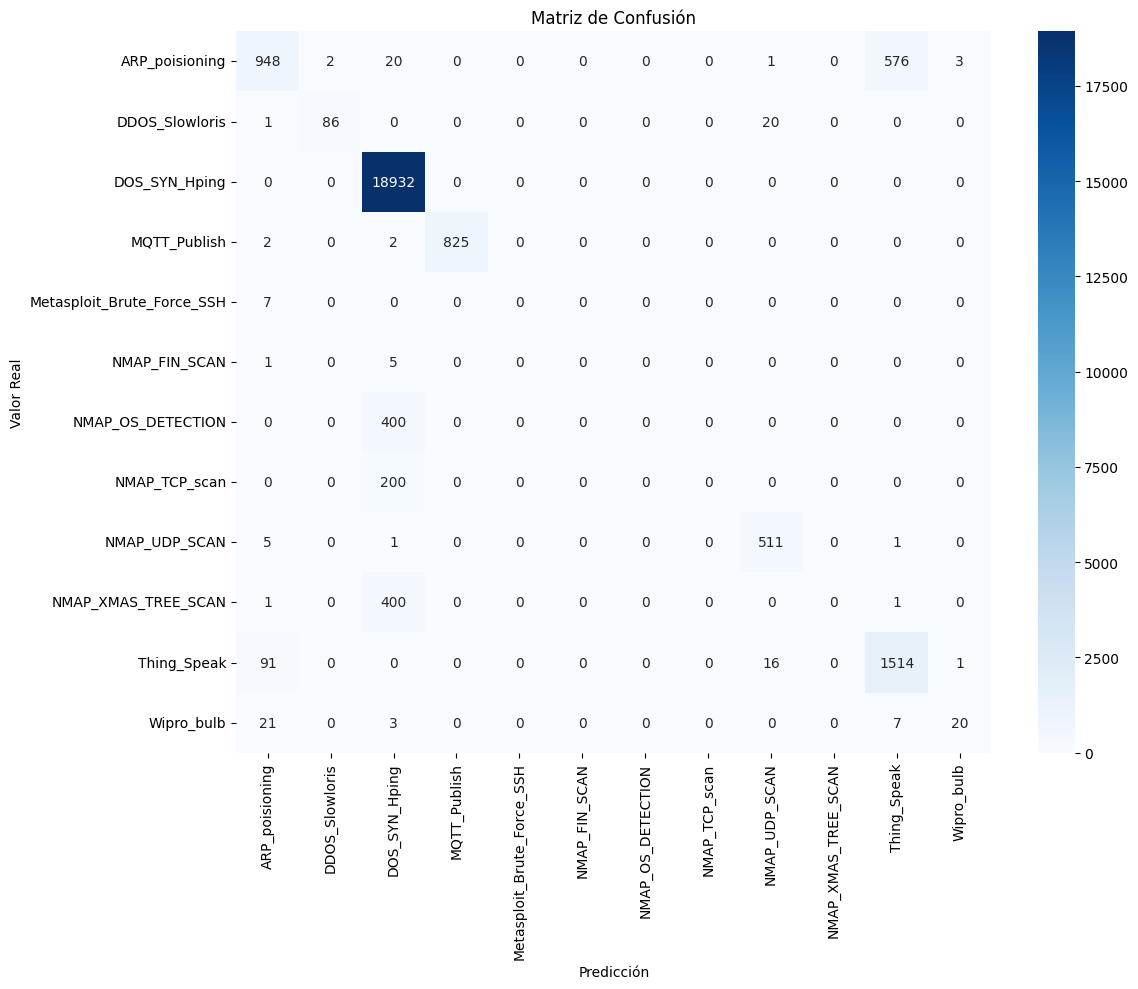

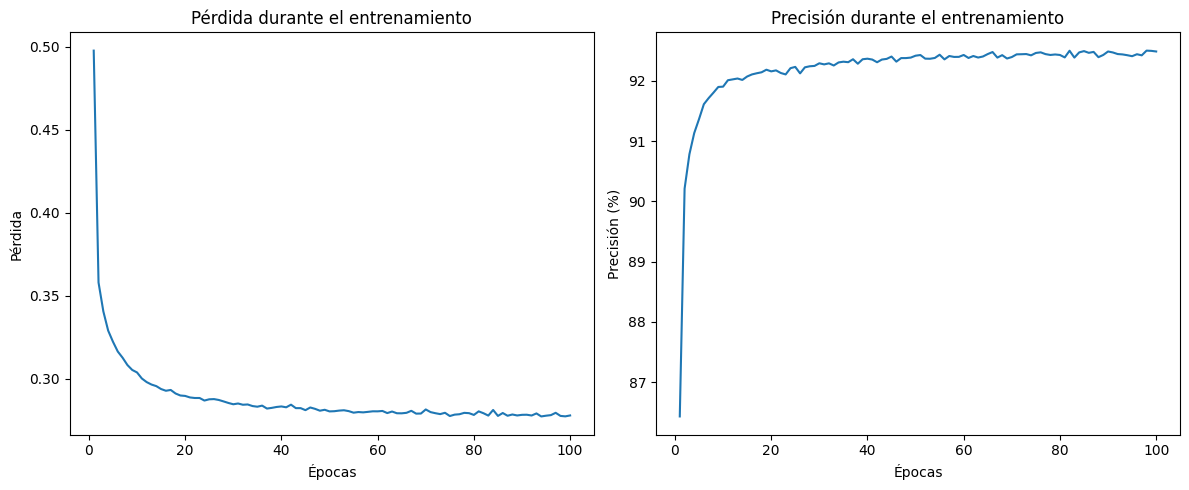

In [95]:
# 3. Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cambiar a modo evaluación
model.eval()

# Listas para almacenar resultados
all_predictions = []
all_labels = []

# Desactivar cálculo de gradientes para evaluación
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    all_predictions = predicted.cpu().numpy()
    all_labels = y_test_tensor.cpu().numpy()
    
    # Calcular precisión global
    test_accuracy = 100 * (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Precisión del modelo en datos de prueba: {test_accuracy:.2f}%')

# Generar reporte de clasificación detallado
print("\nReporte de clasificación:")
print(classification_report(all_labels, all_predictions, 
                           target_names=label_encoder_y.classes_))

# Visualizar matriz de confusión
plt.figure(figsize=(12, 10))
cm = confusion_matrix(all_labels, all_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder_y.classes_,
            yticklabels=label_encoder_y.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Visualizar curvas de aprendizaje
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies)
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')
plt.tight_layout()
plt.savefig('learning_curves.png')
plt.show()

5. HIPERPARAMETROS

In [96]:
# 5. Definición y establecimiento de los valores óptimos de los hiperparámetros
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
import numpy as np

# Función para entrenar y evaluar el modelo con un conjunto específico de hiperparámetros
def evaluar_modelo(hidden_size1, hidden_size2, dropout1, dropout2, learning_rate, batch_size, X_train_tensor, y_train_tensor):
    # Parámetros del modelo
    input_size = X_train_tensor.shape[1]
    num_classes = len(torch.unique(y_train_tensor))
    
    # Definir modelo con los hiperparámetros proporcionados
    class ModeloHiperparametros(nn.Module):
        def __init__(self):
            super(ModeloHiperparametros, self).__init__()
            self.layer1 = nn.Linear(input_size, hidden_size1)
            self.relu1 = nn.ReLU()
            self.dropout1 = nn.Dropout(dropout1)
            
            self.layer2 = nn.Linear(hidden_size1, hidden_size2)
            self.relu2 = nn.ReLU()
            self.dropout2 = nn.Dropout(dropout2)
            
            self.output_layer = nn.Linear(hidden_size2, num_classes)
        
        def forward(self, x):
            x = self.layer1(x)
            x = self.relu1(x)
            x = self.dropout1(x)
            
            x = self.layer2(x)
            x = self.relu2(x)
            x = self.dropout2(x)
            
            x = self.output_layer(x)
            return x
    
    # Configurar validación cruzada con 3 folds
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    accuracies = []
    
    # Realizar validación cruzada
    for train_idx, val_idx in kf.split(X_train_tensor):
        # Dividir datos en entrenamiento y validación
        X_train_fold = X_train_tensor[train_idx]
        y_train_fold = y_train_tensor[train_idx]
        X_val_fold = X_train_tensor[val_idx]
        y_val_fold = y_train_tensor[val_idx]
        
        # Crear modelo
        model = ModeloHiperparametros()
        
        # Definir criterio y optimizador
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Crear DataLoader
        from torch.utils.data import TensorDataset, DataLoader
        train_dataset = TensorDataset(X_train_fold, y_train_fold)
        train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
        
        # Entrenar modelo (5 épocas para validación rápida)
        num_epochs = 5
        for epoch in range(num_epochs):
            model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
        
        # Evaluar modelo
        model.eval()
        with torch.no_grad():
            outputs = model(X_val_fold)
            _, predicted = torch.max(outputs.data, 1)
            accuracy = (predicted == y_val_fold).sum().item() / len(y_val_fold)
            accuracies.append(accuracy)
    
    # Devolver precisión promedio de validación cruzada
    return np.mean(accuracies)

# Definir las combinaciones de hiperparámetros a probar
configuraciones = [
    # hidden_size1, hidden_size2, dropout1, dropout2, learning_rate, batch_size
    (32, 16, 0.2, 0.1, 0.001, 32),
    (64, 32, 0.3, 0.2, 0.001, 64),
    (128, 64, 0.4, 0.3, 0.0005, 128),
    (64, 32, 0.3, 0.2, 0.0003, 64),
    (96, 48, 0.25, 0.15, 0.001, 96)
]

print("Comenzando búsqueda de hiperparámetros óptimos...")
print("-" * 50)

# Probar cada combinación de hiperparámetros
resultados = []
for config in configuraciones:
    hidden_size1, hidden_size2, dropout1, dropout2, learning_rate, batch_size = config
    
    # Mostrar la configuración que se está probando
    print(f"Probando configuración:")
    print(f"  - Hidden Size 1: {hidden_size1}")
    print(f"  - Hidden Size 2: {hidden_size2}")
    print(f"  - Dropout 1: {dropout1}")
    print(f"  - Dropout 2: {dropout2}")
    print(f"  - Learning Rate: {learning_rate}")
    print(f"  - Batch Size: {batch_size}")
    
    # Evaluar la configuración
    accuracy = evaluar_modelo(hidden_size1, hidden_size2, dropout1, dropout2, 
                              learning_rate, batch_size, X_train_tensor, y_train_tensor)
    
    print(f"  Precisión promedio: {accuracy * 100:.2f}%")
    print("-" * 50)
    
    # Guardar resultados
    resultados.append((config, accuracy))

# Ordenar resultados por precisión
resultados_ordenados = sorted(resultados, key=lambda x: x[1], reverse=True)

# Mostrar la mejor configuración
mejor_config, mejor_accuracy = resultados_ordenados[0]
hidden_size1, hidden_size2, dropout1, dropout2, learning_rate, batch_size = mejor_config

print("\nMejor configuración de hiperparámetros:")
print(f"  - Hidden Size 1: {hidden_size1}")
print(f"  - Hidden Size 2: {hidden_size2}")
print(f"  - Dropout 1: {dropout1}")
print(f"  - Dropout 2: {dropout2}")
print(f"  - Learning Rate: {learning_rate}")
print(f"  - Batch Size: {batch_size}")
print(f"  Precisión promedio: {mejor_accuracy * 100:.2f}%")

# Guardar los hiperparámetros óptimos para su uso posterior
hiperparametros_optimos = {
    'hidden_size1': hidden_size1,
    'hidden_size2': hidden_size2,
    'dropout1': dropout1,
    'dropout2': dropout2,
    'learning_rate': learning_rate,
    'batch_size': batch_size
}

print("\nEstos valores óptimos de hiperparámetros se pueden utilizar para configurar el modelo final.")

Comenzando búsqueda de hiperparámetros óptimos...
--------------------------------------------------
Probando configuración:
  - Hidden Size 1: 32
  - Hidden Size 2: 16
  - Dropout 1: 0.2
  - Dropout 2: 0.1
  - Learning Rate: 0.001
  - Batch Size: 32
  Precisión promedio: 91.06%
--------------------------------------------------
Probando configuración:
  - Hidden Size 1: 64
  - Hidden Size 2: 32
  - Dropout 1: 0.3
  - Dropout 2: 0.2
  - Learning Rate: 0.001
  - Batch Size: 64
  Precisión promedio: 91.61%
--------------------------------------------------
Probando configuración:
  - Hidden Size 1: 128
  - Hidden Size 2: 64
  - Dropout 1: 0.4
  - Dropout 2: 0.3
  - Learning Rate: 0.0005
  - Batch Size: 128
  Precisión promedio: 90.29%
--------------------------------------------------
Probando configuración:
  - Hidden Size 1: 64
  - Hidden Size 2: 32
  - Dropout 1: 0.3
  - Dropout 2: 0.2
  - Learning Rate: 0.0003
  - Batch Size: 64
  Precisión promedio: 90.88%
--------------------------

6. Entrenamiento de los modelos, presentación e interpretación de los valores y graficas de la función de costo(error) y la precisión.

Arquitectura del modelo:
ModeloOptimizado(
  (layer1): Linear(in_features=5, out_features=96, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.25, inplace=False)
  (layer2): Linear(in_features=96, out_features=48, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.15, inplace=False)
  (output_layer): Linear(in_features=48, out_features=12, bias=True)
)

Hiperparámetros utilizados:
- Hidden Size 1: 96
- Hidden Size 2: 48
- Dropout 1: 0.25
- Dropout 2: 0.15
- Learning Rate: 0.001
- Batch Size: 96

Iniciando entrenamiento...
Época [5/50]:
  Pérdida entrenamiento: 0.3150, Precisión: 91.70%
  Pérdida validación: 0.2913, Precisión: 92.11%
Época [10/50]:
  Pérdida entrenamiento: 0.2975, Precisión: 92.13%
  Pérdida validación: 0.2806, Precisión: 92.40%
Época [15/50]:
  Pérdida entrenamiento: 0.2887, Precisión: 92.23%
  Pérdida validación: 0.2741, Precisión: 92.58%
Época [20/50]:
  Pérdida entrenamiento: 0.2836, Precisión: 92.32%
  Pérdida validación: 0.2705, Precisión: 92.66%
Época [

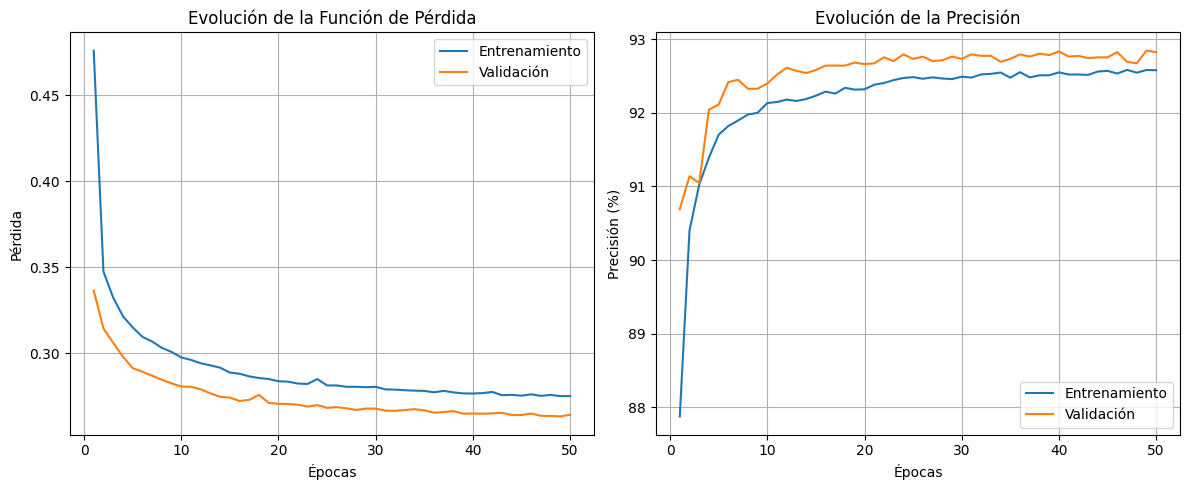


Interpretación de las gráficas de entrenamiento:
- La función de pérdida muestra cómo el error disminuye durante el entrenamiento.
- La curva de precisión muestra cómo mejora el rendimiento del modelo.

Análisis del comportamiento del modelo:
- Precisión media en las últimas 5 épocas (entrenamiento): 92.56%
- Precisión media en las últimas 5 épocas (validación): 92.77%
- Diferencia entre precisiones: 0.21%
- El modelo parece estar bien ajustado, con un buen equilibrio entre sesgo y varianza.


In [97]:
# 1. Entrenamiento del modelo, presentación e interpretación de los valores y gráficas

import matplotlib.pyplot as plt
import numpy as np
import time

# Usar los hiperparámetros óptimos encontrados
hidden_size1 = hiperparametros_optimos['hidden_size1']
hidden_size2 = hiperparametros_optimos['hidden_size2']
dropout1 = hiperparametros_optimos['dropout1']
dropout2 = hiperparametros_optimos['dropout2']
learning_rate = hiperparametros_optimos['learning_rate']
batch_size = hiperparametros_optimos['batch_size']

# Crear modelo con los hiperparámetros óptimos
input_size = X_train_tensor.shape[1]
num_classes = len(torch.unique(y_train_tensor))

class ModeloOptimizado(nn.Module):
    def __init__(self):
        super(ModeloOptimizado, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout1)
        
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout2)
        
        self.output_layer = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.output_layer(x)
        return x

# Instanciar el modelo
model = ModeloOptimizado()
print("Arquitectura del modelo:")
print(model)
print("\nHiperparámetros utilizados:")
print(f"- Hidden Size 1: {hidden_size1}")
print(f"- Hidden Size 2: {hidden_size2}")
print(f"- Dropout 1: {dropout1}")
print(f"- Dropout 2: {dropout2}")
print(f"- Learning Rate: {learning_rate}")
print(f"- Batch Size: {batch_size}")

# Definir criterio y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Crear DataLoader
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Listas para almacenar métricas
train_losses = []
train_accuracies = []
validation_losses = []
validation_accuracies = []

# Separar un conjunto de validación (10% del conjunto de entrenamiento)
from sklearn.model_selection import train_test_split
X_train_subset, X_val, y_train_subset, y_val = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.1, random_state=42, stratify=y_train_tensor
)

# Crear DataLoader para el conjunto de entrenamiento reducido
train_subset_dataset = TensorDataset(X_train_subset, y_train_subset)
train_subset_loader = DataLoader(dataset=train_subset_dataset, batch_size=batch_size, shuffle=True)

# Número de épocas
num_epochs = 50

print("\nIniciando entrenamiento...")
start_time = time.time()

# Bucle de entrenamiento
for epoch in range(num_epochs):
    # Modo entrenamiento
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Entrenamiento con el conjunto de entrenamiento
    for inputs, labels in train_subset_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calcular métricas de entrenamiento
    train_loss = running_loss / len(train_subset_loader)
    train_accuracy = 100 * correct / total
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Evaluación en conjunto de validación
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        outputs = model(X_val)
        val_loss = criterion(outputs, y_val)
        _, predicted = torch.max(outputs.data, 1)
        val_total = y_val.size(0)
        val_correct = (predicted == y_val).sum().item()
    
    # Calcular métricas de validación
    validation_loss = val_loss.item()
    validation_accuracy = 100 * val_correct / val_total
    
    validation_losses.append(validation_loss)
    validation_accuracies.append(validation_accuracy)
    
    # Mostrar progreso cada 5 épocas
    if (epoch + 1) % 5 == 0:
        print(f'Época [{epoch+1}/{num_epochs}]:')
        print(f'  Pérdida entrenamiento: {train_loss:.4f}, Precisión: {train_accuracy:.2f}%')
        print(f'  Pérdida validación: {validation_loss:.4f}, Precisión: {validation_accuracy:.2f}%')

# Calcular tiempo total de entrenamiento
training_time = time.time() - start_time
print(f"\nEntrenamiento completado en {training_time:.2f} segundos ({training_time/60:.2f} minutos)")

# Visualizar las gráficas de pérdida y precisión
plt.figure(figsize=(12, 5))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Entrenamiento')
plt.plot(range(1, num_epochs+1), validation_losses, label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Función de Pérdida')
plt.legend()
plt.grid(True)

# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Entrenamiento')
plt.plot(range(1, num_epochs+1), validation_accuracies, label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')
plt.title('Evolución de la Precisión')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('training_metrics.png')
plt.show()

print("\nInterpretación de las gráficas de entrenamiento:")
print("- La función de pérdida muestra cómo el error disminuye durante el entrenamiento.")
print("- La curva de precisión muestra cómo mejora el rendimiento del modelo.")

# Análisis del comportamiento de las curvas
last_5_train_acc = np.mean(train_accuracies[-5:])
last_5_val_acc = np.mean(validation_accuracies[-5:])
acc_diff = abs(last_5_train_acc - last_5_val_acc)

print("\nAnálisis del comportamiento del modelo:")
print(f"- Precisión media en las últimas 5 épocas (entrenamiento): {last_5_train_acc:.2f}%")
print(f"- Precisión media en las últimas 5 épocas (validación): {last_5_val_acc:.2f}%")
print(f"- Diferencia entre precisiones: {acc_diff:.2f}%")

if acc_diff > 5:
    print("- Advertencia: Posible sobreajuste (overfitting) - La precisión de entrenamiento es significativamente mayor que la de validación.")
elif np.mean(train_accuracies[-5:]) < 60:
    print("- Advertencia: Posible subajuste (underfitting) - La precisión de entrenamiento es relativamente baja.")
else:
    print("- El modelo parece estar bien ajustado, con un buen equilibrio entre sesgo y varianza.")

7. Prueba de los modelos, presentación e interpretación de los valores y graficas de la función de costo(error) y la precisión.

Evaluando el modelo en el conjunto de prueba...

Resultados en el conjunto de prueba:
Pérdida: 0.9125
Precisión: 92.69%

Reporte de clasificación detallado:
                            precision    recall  f1-score   support

            ARP_poisioning       0.89      0.60      0.71      1550
            DDOS_Slowloris       1.00      0.80      0.89       107
             DOS_SYN_Hping       0.95      1.00      0.97     18932
              MQTT_Publish       1.00      1.00      1.00       829
Metasploit_Brute_Force_SSH       0.00      0.00      0.00         7
             NMAP_FIN_SCAN       0.00      0.00      0.00         6
         NMAP_OS_DETECTION       0.00      0.00      0.00       400
             NMAP_TCP_scan       0.00      0.00      0.00       200
             NMAP_UDP_SCAN       0.93      0.99      0.96       518
       NMAP_XMAS_TREE_SCAN       0.00      0.00      0.00       402
               Thing_Speak       0.71      0.94      0.81      1622
                Wipro_bulb

C:\Users\LUIS FABIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LUIS FABIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LUIS FABIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\met

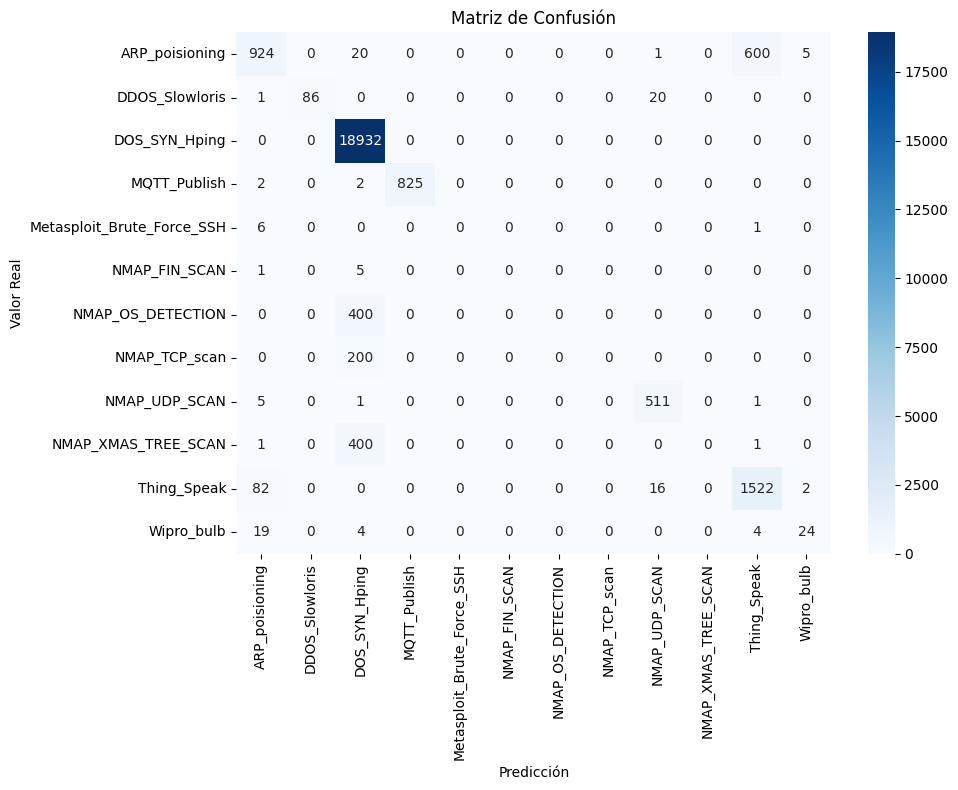

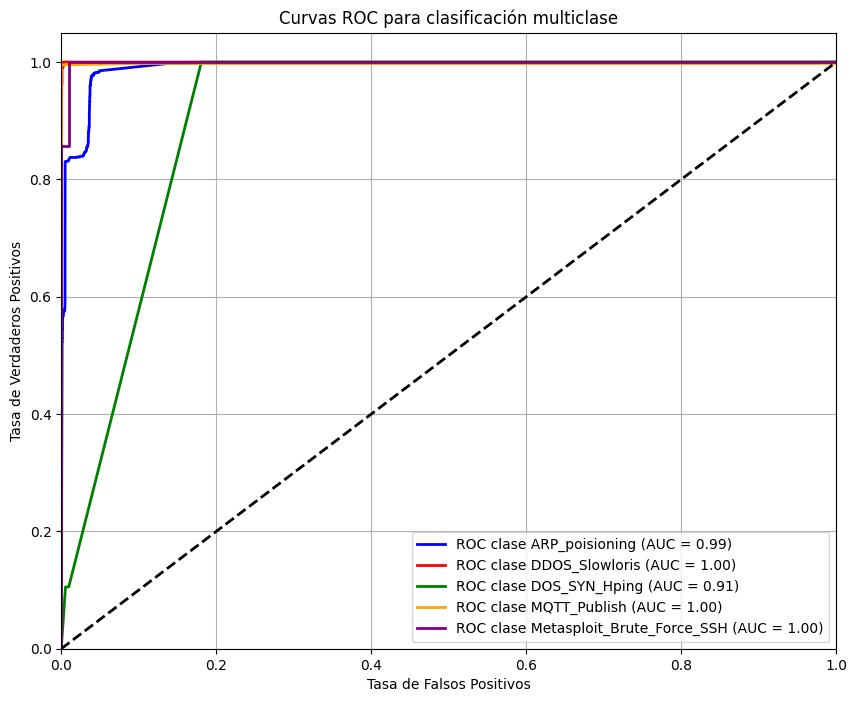

C:\Users\LUIS FABIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LUIS FABIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LUIS FABIAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\met

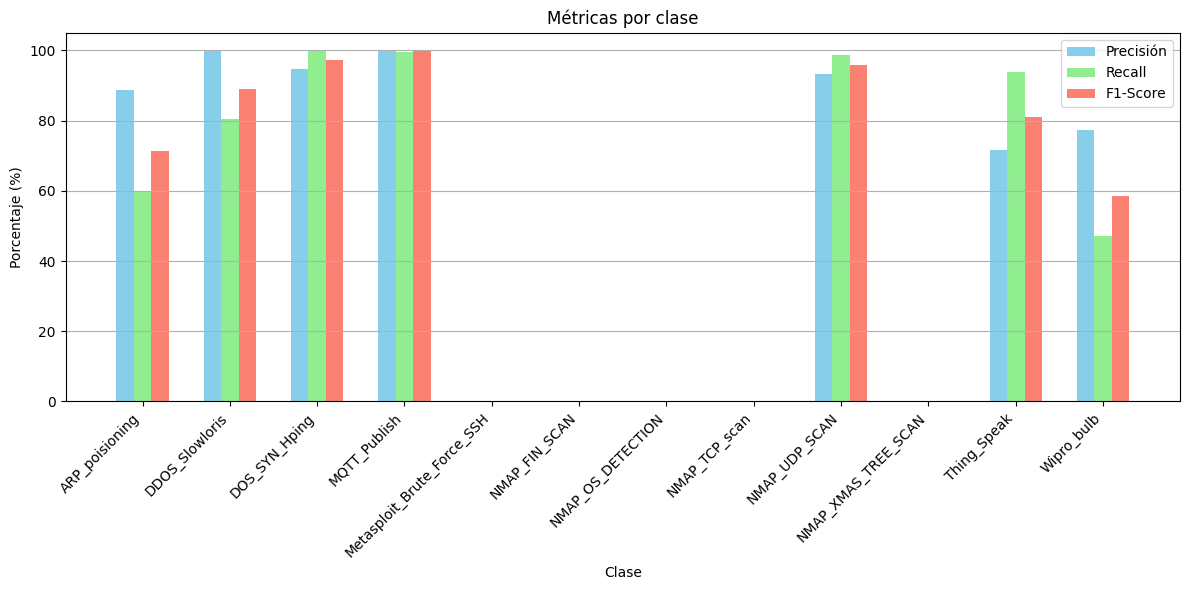


Interpretación de los resultados de prueba:
1. La matriz de confusión muestra los aciertos y errores para cada clase.
2. Las curvas ROC ilustran el rendimiento del clasificador para cada clase.
3. El gráfico de barras compara precisión, recall y F1-score entre clases.

Fortalezas y debilidades del modelo:
- Mayor rendimiento en la clase 'MQTT_Publish' con F1-Score: 99.76%
- Menor rendimiento en la clase 'Metasploit_Brute_Force_SSH' con F1-Score: 0.00%


In [99]:
# 2. Prueba del modelo, presentación e interpretación de los valores y gráficas

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

print("Evaluando el modelo en el conjunto de prueba...")

# Cambiar a modo evaluación
model.eval()

# Evaluar en conjunto de prueba
with torch.no_grad():
    # Calcular pérdida en test
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor).item()
    
    # Calcular precisión en test
    _, predicted = torch.max(test_outputs.data, 1)
    test_accuracy = 100 * (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    
    # Convertir a numpy para análisis detallado
    y_pred = predicted.cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

print("\nResultados en el conjunto de prueba:")
print(f"Pérdida: {test_loss:.4f}")
print(f"Precisión: {test_accuracy:.2f}%")

# Generar reporte de clasificación
class_names = label_encoder_y.classes_
print("\nReporte de clasificación detallado:")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Calcular y visualizar curvas ROC para cada clase (One vs Rest)
n_classes = len(class_names)

# Binarizar las etiquetas
y_test_bin = label_binarize(y_true, classes=range(n_classes))

# Obtener probabilidades para cada clase
test_probs = torch.nn.functional.softmax(test_outputs, dim=1).cpu().numpy()

# Calcular ROC curve y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    if i < len(class_names):  # Verificar que hay suficientes clases
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Mostrar solo las primeras 5 clases para no saturar la gráfica
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
classes_to_plot = min(5, n_classes)  # Mostrar máximo 5 clases

for i, color in zip(range(classes_to_plot), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC clase {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para clasificación multiclase')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curves.png')
plt.show()

# Analizar rendimiento por clase
classification_metrics = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Extraer precisión, recall y f1-score por clase
metrics_df = {
    'Clase': [],
    'Precisión': [],
    'Recall': [],
    'F1-Score': [],
    'Muestras': []
}
for cls in class_names:
    if cls in classification_metrics:
        metrics_df['Clase'].append(cls)
        metrics_df['Precisión'].append(classification_metrics[cls]['precision'] * 100)
        metrics_df['Recall'].append(classification_metrics[cls]['recall'] * 100)
        metrics_df['F1-Score'].append(classification_metrics[cls]['f1-score'] * 100)
        metrics_df['Muestras'].append(classification_metrics[cls]['support'])

# Visualizar métricas por clase
plt.figure(figsize=(12, 6))
x = range(len(metrics_df['Clase']))
width = 0.2

plt.bar([i - width for i in x], metrics_df['Precisión'], width=width, label='Precisión', color='skyblue')
plt.bar(x, metrics_df['Recall'], width=width, label='Recall', color='lightgreen')
plt.bar([i + width for i in x], metrics_df['F1-Score'], width=width, label='F1-Score', color='salmon')

plt.xlabel('Clase')
plt.ylabel('Porcentaje (%)')
plt.title('Métricas por clase')
plt.xticks(x, metrics_df['Clase'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('metrics_by_class.png')
plt.show()

print("\nInterpretación de los resultados de prueba:")
print("1. La matriz de confusión muestra los aciertos y errores para cada clase.")
print("2. Las curvas ROC ilustran el rendimiento del clasificador para cada clase.")
print("3. El gráfico de barras compara precisión, recall y F1-score entre clases.")

# Identificar fortalezas y debilidades
best_class_idx = metrics_df['F1-Score'].index(max(metrics_df['F1-Score']))
worst_class_idx = metrics_df['F1-Score'].index(min(metrics_df['F1-Score']))

print("\nFortalezas y debilidades del modelo:")
print(f"- Mayor rendimiento en la clase '{metrics_df['Clase'][best_class_idx]}' con F1-Score: {metrics_df['F1-Score'][best_class_idx]:.2f}%")
print(f"- Menor rendimiento en la clase '{metrics_df['Clase'][worst_class_idx]}' con F1-Score: {metrics_df['F1-Score'][worst_class_idx]:.2f}%")

8. Interpretación de los resultados obtenidos.

Resumen de resultados:
                      Métrica  Valor (%)
0  Precisión en entrenamiento  92.576966
1     Precisión en validación  92.822335
2         Precisión en prueba  92.690058


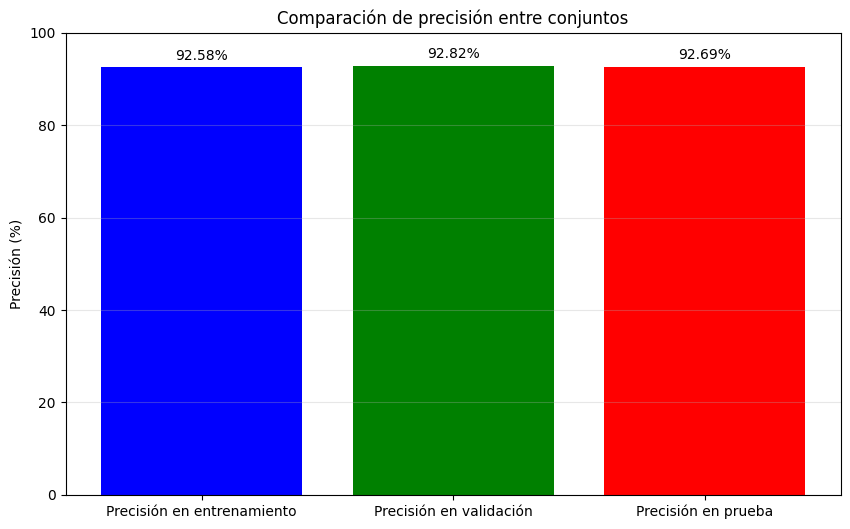


INTERPRETACIÓN DETALLADA DE RESULTADOS

1. Análisis de ajuste del modelo:
   - Buen ajuste: Diferencia entre entrenamiento y validación: 0.25%
   - El modelo parece generalizar bien a datos no vistos durante el entrenamiento.

2. Análisis de rendimiento general:
   - Rendimiento excelente: 92.69% de precisión en prueba
   - El modelo clasifica correctamente la gran mayoría de los casos de prueba.

3. Análisis por tipo de ataque:
   - Mejor detectado: clase 'MQTT_Publish' con F1-Score: 99.76%
   - Peor detectado: clase 'Metasploit_Brute_Force_SSH' con F1-Score: 0.00%

4. Implicaciones para seguridad en IoT:
   - Los sistemas IoT son particularmente vulnerables a ataques debido a sus recursos limitados.
   - La precisión en tiempo real es crucial para prevenir intrusiones exitosas.
   - Con una precisión de 92.69%, este modelo podría:
     * Servir como sistema primario de detección de intrusiones
     * Operar como parte de un sistema de seguridad en producción

5. Conclusiones y recom

In [100]:
# 3. Interpretación de los resultados obtenidos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reunir todas las métricas en un solo lugar
resultados = {
    'Métrica': ['Precisión en entrenamiento', 'Precisión en validación', 'Precisión en prueba'],
    'Valor (%)': [train_accuracies[-1], validation_accuracies[-1], test_accuracy]
}

# Crear DataFrame para mejor visualización
resultados_df = pd.DataFrame(resultados)
print("Resumen de resultados:")
print(resultados_df)

# Visualizar comparación de resultados
plt.figure(figsize=(10, 6))
bars = plt.bar(resultados['Métrica'], resultados['Valor (%)'], color=['blue', 'green', 'red'])

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.2f}%', ha='center', va='bottom')

plt.title('Comparación de precisión entre conjuntos')
plt.ylabel('Precisión (%)')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.savefig('accuracy_comparison.png')
plt.show()

# Análisis de los resultados
print("\n=======================================")
print("INTERPRETACIÓN DETALLADA DE RESULTADOS")
print("=======================================\n")

# 1. Analizar signos de sobre/sub ajuste
train_val_diff = abs(train_accuracies[-1] - validation_accuracies[-1])
val_test_diff = abs(validation_accuracies[-1] - test_accuracy)

print("1. Análisis de ajuste del modelo:")
if train_val_diff > 5:
    print(f"   - Posible sobreajuste: Diferencia entre entrenamiento y validación: {train_val_diff:.2f}%")
    print("   - El modelo puede estar memorizando los datos de entrenamiento en lugar de aprender patrones generalizables.")
    print("   - Recomendación: Considerar aumentar regularización (dropout) o reducir complejidad del modelo.")
elif train_accuracies[-1] < 70:
    print(f"   - Posible subajuste: Precisión de entrenamiento relativamente baja: {train_accuracies[-1]:.2f}%")
    print("   - El modelo puede ser demasiado simple para capturar la complejidad de los datos.")
    print("   - Recomendación: Considerar aumentar complejidad del modelo o reducir regularización.")
else:
    print(f"   - Buen ajuste: Diferencia entre entrenamiento y validación: {train_val_diff:.2f}%")
    print("   - El modelo parece generalizar bien a datos no vistos durante el entrenamiento.")

# 2. Analizar rendimiento general
print("\n2. Análisis de rendimiento general:")
if test_accuracy >= 90:
    print(f"   - Rendimiento excelente: {test_accuracy:.2f}% de precisión en prueba")
    print("   - El modelo clasifica correctamente la gran mayoría de los casos de prueba.")
elif test_accuracy >= 80:
    print(f"   - Rendimiento bueno: {test_accuracy:.2f}% de precisión en prueba")
    print("   - El modelo funciona bien pero hay margen de mejora.")
elif test_accuracy >= 70:
    print(f"   - Rendimiento aceptable: {test_accuracy:.2f}% de precisión en prueba")
    print("   - El modelo es funcional pero podría beneficiarse de mejoras significativas.")
else:
    print(f"   - Rendimiento insuficiente: {test_accuracy:.2f}% de precisión en prueba")
    print("   - El modelo necesita mejoras importantes para ser práctico en aplicaciones reales.")

# 3. Analizar tipos de ataques mejor y peor detectados
print("\n3. Análisis por tipo de ataque:")
print(f"   - Mejor detectado: clase '{metrics_df['Clase'][best_class_idx]}' con F1-Score: {metrics_df['F1-Score'][best_class_idx]:.2f}%")
print(f"   - Peor detectado: clase '{metrics_df['Clase'][worst_class_idx]}' con F1-Score: {metrics_df['F1-Score'][worst_class_idx]:.2f}%")

# 4. Analizar implicaciones para seguridad IoT
print("\n4. Implicaciones para seguridad en IoT:")
print("   - Los sistemas IoT son particularmente vulnerables a ataques debido a sus recursos limitados.")
print("   - La precisión en tiempo real es crucial para prevenir intrusiones exitosas.")
print(f"   - Con una precisión de {test_accuracy:.2f}%, este modelo podría:")
if test_accuracy >= 85:
    print("     * Servir como sistema primario de detección de intrusiones")
    print("     * Operar como parte de un sistema de seguridad en producción")
elif test_accuracy >= 75:
    print("     * Funcionar como sistema complementario de detección")
    print("     * Ayudar a identificar patrones de ataque conocidos")
else:
    print("     * Ser utilizado solo como sistema auxiliar con supervisión humana")
    print("     * Requerir mejoras antes de su implementación en entornos críticos")

# 5. Conclusiones y recomendaciones
print("\n5. Conclusiones y recomendaciones:")
print("   a) Sobre el modelo:")
if test_accuracy - validation_accuracies[-1] < -3:
    print("      - El modelo no generalizó bien al conjunto de prueba.")
    print("      - Considerar técnicas de regularización adicionales.")
else:
    print("      - El modelo muestra buena generalización entre validación y prueba.")

print("\n   b) Mejoras potenciales:")
print("      - Explorar arquitecturas más complejas o diferentes (LSTM, GRU para datos secuenciales)")
print("      - Realizar ingeniería de características adicional")
print("      - Implementar técnicas de balanceo de clases si existe desbalance")
print("      - Probar diferentes hiperparámetros (learning rate, regularización)")

print("\n   c) Aplicación práctica:")
print("      - Implementar monitoreo continuo del rendimiento en datos reales")
print("      - Establecer umbral de confianza mínimo para alertas")
print("      - Considerar retroalimentación de expertos para refinamiento")

print("\n=======================================")
print("Esta interpretación ofrece una visión completa del rendimiento del modelo de detección de ataques")
print("entrenado con el dataset RT-IoT2022 y proporciona orientación para mejorar su efectividad.")
print("=======================================")